In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the datasets
customers = pd.read_csv("Customers.csv")
products = pd.read_csv("Products.csv")
transactions = pd.read_csv("Transactions.csv")

In [3]:
# Inspect the datasets
print("Customers dataset:")
print(customers.head())
print(customers.info())

print("Products dataset:")
print(products.head())
print(products.info())

print("Transactions dataset:")
print(transactions.head())
print(transactions.info())

Customers dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None
Products dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving B

In [40]:
# Check for duplicates and null values
print("Checking for duplicate entries and null values...")
print("Customers - Duplicates:", customers.duplicated().sum())
print("Products - Duplicates:", products.duplicated().sum())
print("Transactions - Duplicates:", transactions.duplicated().sum())

Checking for duplicate entries and null values...
Customers - Duplicates: 0
Products - Duplicates: 0
Transactions - Duplicates: 0


In [20]:
# Merge datasets for comprehensive analysis
merged_data = pd.merge(transactions, customers, on="CustomerID", how="inner")
merged_data = pd.merge(merged_data, products, on="ProductID", how="inner")
merged_data.rename(columns={'Price_x': 'Price_product', 'Price_y': 'Price_Transaction'}, inplace=True)

In [21]:
merged_data.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_product,CustomerName,Region,SignupDate,ProductName,Category,Price_Transaction
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,Travis Campbell,South America,2024-04-11,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,Timothy Perez,Europe,2022-03-15,ComfortLiving Bluetooth Speaker,Electronics,300.68


In [8]:
# Basic statistics
print("Merged Data Statistics:")
merged_data.describe()

Merged Data Statistics:


,Quantity,TotalValue,Price_x,Price_y
count,1000.000000,1000.000000,1000.00000,1000.00000
mean,2.537000,689.995560,272.55407,272.55407
std,1.117981,493.144478,140.73639,140.73639
min,1.000000,16.080000,16.08000,16.08000
25%,2.000000,295.295000,147.95000,147.95000
50%,3.000000,588.880000,299.93000,299.93000
75%,4.000000,1011.660000,404.40000,404.40000
max,4.000000,1991.040000,497.76000,497.76000


In [7]:
# 1. Top regions by total transaction value
region_sales = merged_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print("Top regions by total transaction value:")
region_sales


Top regions by total transaction value:


,TotalValue
Region,
South America,219352.56
Europe,166254.63
North America,152313.40
Asia,152074.97


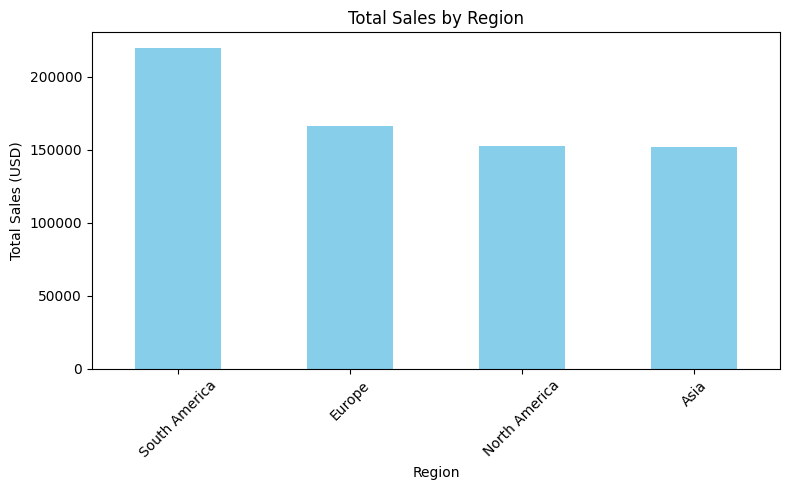

In [9]:

# Visualization: Total Sales by Region
plt.figure(figsize=(8, 5))
region_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("Total Sales (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [11]:
# 2. Top 5 products by sales volume
product_sales = merged_data.groupby("ProductName")["Quantity"].sum().sort_values(ascending=False).head(5)
print("Top 5 products by sales volume:")
product_sales

Top 5 products by sales volume:


,Quantity
ProductName,
ActiveWear Smartwatch,100
SoundWave Headphones,97
HomeSense Desk Lamp,81
ActiveWear Rug,79
SoundWave Cookbook,78


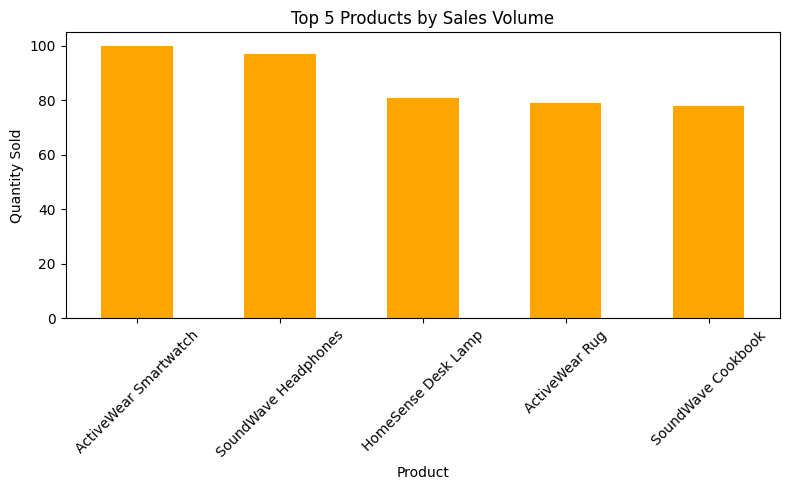

In [12]:
# Visualization: Top 5 Products by Sales Volume
plt.figure(figsize=(8, 5))
product_sales.plot(kind='bar', color='orange')
plt.title("Top 5 Products by Sales Volume")
plt.xlabel("Product")
plt.ylabel("Quantity Sold")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [13]:
# 3. Customer signups by year
customers["SignupDate"] = pd.to_datetime(customers["SignupDate"])
signups_by_year = customers["SignupDate"].dt.year.value_counts().sort_index()
print("Customer signups by year:")
signups_by_year

Customer signups by year:


,count
SignupDate,
2022,64
2023,57
2024,79


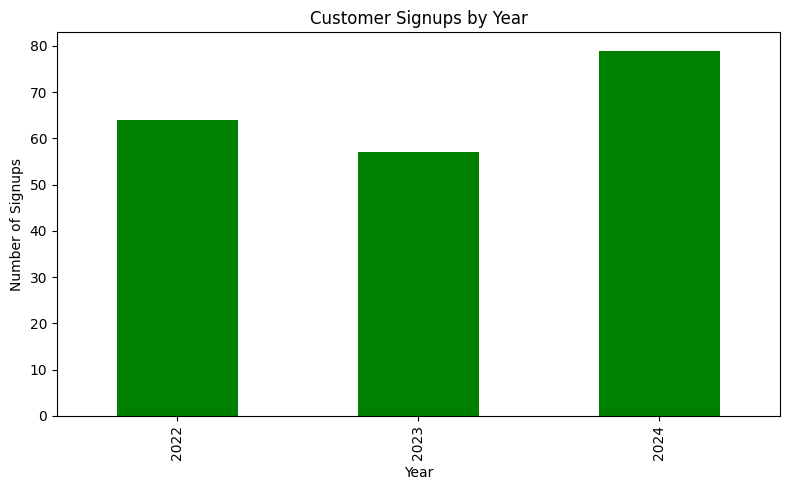

In [14]:
# Visualization: Customer Signups by Year
plt.figure(figsize=(8, 5))
signups_by_year.plot(kind='bar', color='green')
plt.title("Customer Signups by Year")
plt.xlabel("Year")
plt.ylabel("Number of Signups")
plt.tight_layout()
plt.show()

In [16]:
# 4. Category-wise total revenue
category_revenue = merged_data.groupby("Category")["TotalValue"].sum().sort_values(ascending=False)
print("Category-wise total revenue:")
category_revenue

Category-wise total revenue:


,TotalValue
Category,
Books,192147.47
Electronics,180783.50
Clothing,166170.66
Home Decor,150893.93


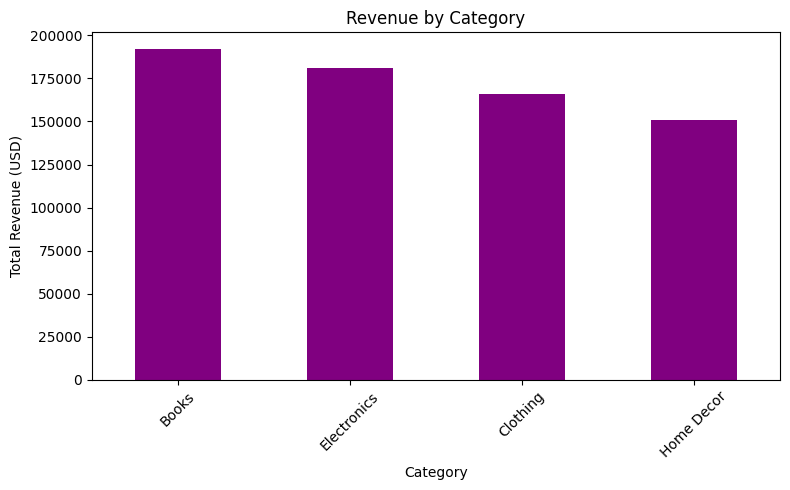

In [17]:
# Visualization: Revenue by Category
plt.figure(figsize=(8, 5))
category_revenue.plot(kind='bar', color='purple')
plt.title("Revenue by Category")
plt.xlabel("Category")
plt.ylabel("Total Revenue (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

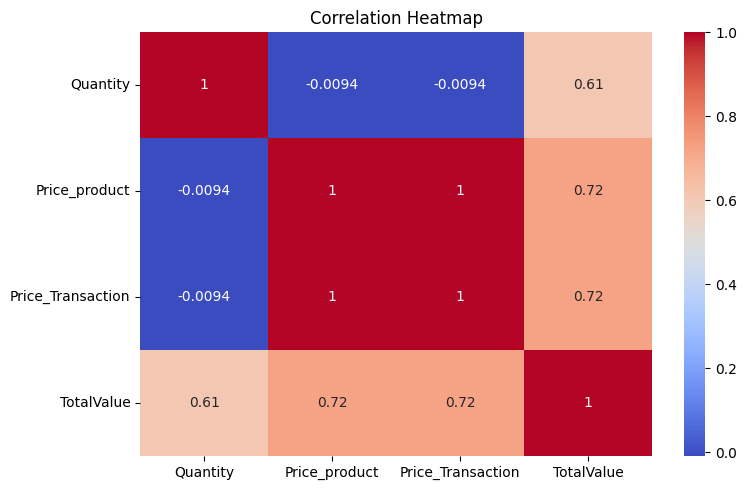

In [23]:
# 5. Correlation heatmap
numeric_data = merged_data[["Quantity", "Price_product","Price_Transaction", "TotalValue"]]
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()